In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### 1. Perform Data Query and Data Inspection
- Load the dataset.
- Display basic information about the dataset (shape, columns, data types).
- Check for missing values and handle them if necessary.
- Display a few rows of the dataset to understand its structure.

In [3]:

curr_dir=os.getcwd()
f_path = os.path.join(curr_dir, "data", "cancer patient data sets.csv")
df=pd.read_csv(f_path)
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [4]:

#drop index column as it is useless
df=df.drop("index", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [5]:
df.isnull().sum()

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [6]:
unique_values_per_column = {}
for column in df.columns:
    unique_values_per_column[column] = df[column].unique()

# Print unique values for each column
for column, values in unique_values_per_column.items():
    if column != "Patient Id":
        print(f"Unique values for column '{column}': {values}")

Unique values for column 'Age': [33 17 35 37 46 52 28 44 64 39 34 27 73 36 14 24 53 62 29 65 38 19 42 32
 25 45 26 48 22 18 23 47 61 55 31 49 43 51 54 63]
Unique values for column 'Gender': [1 2]
Unique values for column 'Air Pollution': [2 3 4 7 6 5 1 8]
Unique values for column 'Alcohol use': [4 1 5 7 8 3 6 2]
Unique values for column 'Dust Allergy': [5 6 7 4 2 8 1 3]
Unique values for column 'OccuPational Hazards': [4 3 5 7 2 6 8 1]
Unique values for column 'Genetic Risk': [3 4 5 6 7 2 1]
Unique values for column 'chronic Lung Disease': [2 4 7 6 3 5 1]
Unique values for column 'Balanced Diet': [2 6 7 4 5 3 1]
Unique values for column 'Obesity': [4 2 7 3 5 6 1]
Unique values for column 'Smoking': [3 2 7 8 1 6 5 4]
Unique values for column 'Passive Smoker': [2 4 3 7 6 8 5 1]
Unique values for column 'Chest Pain': [2 4 7 3 6 5 9 8 1]
Unique values for column 'Coughing of Blood': [4 3 8 9 1 5 7 6 2]
Unique values for column 'Fatigue': [3 1 8 4 5 9 2 6]
Unique values for column 'Weight L

In [7]:
df.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


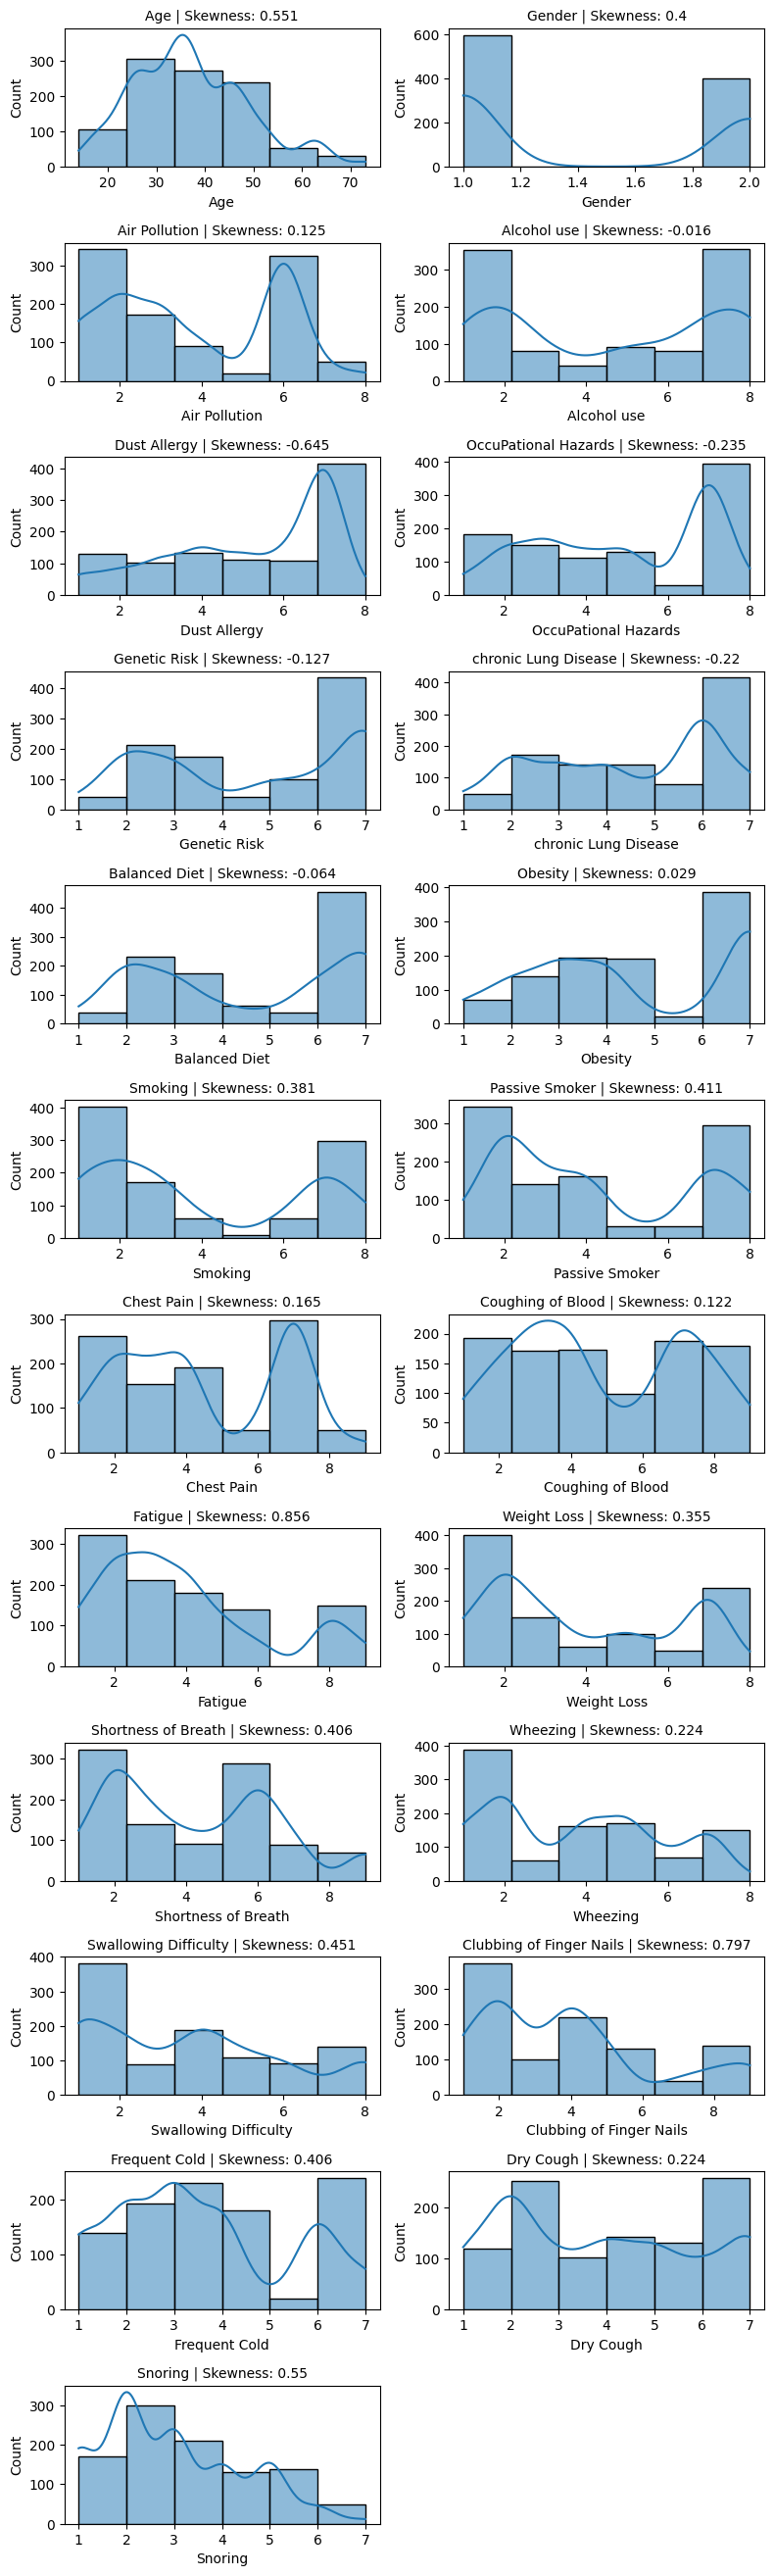

In [9]:
# Remove patient id and label
features = df.drop(["Patient Id","Level"], axis=1)
plt.figure(figsize=(8, 25*2))

for index, feature in enumerate(features, 1):
    plt.subplot(23, 2, index)
    sns.histplot(df[feature], kde=True,bins=6)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 3)}",fontsize=10)
 
plt.tight_layout()
plt.show()

<Axes: >

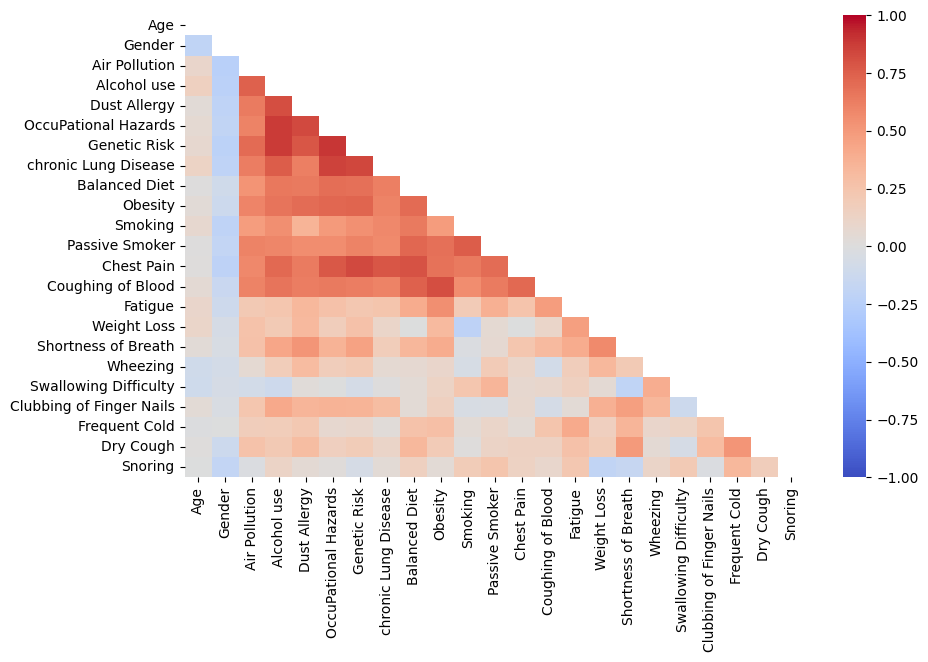

In [19]:
plt.figure(figsize=(10, 6))
cmap=sns.color_palette("coolwarm", as_cmap=True)
mask = np.triu(np.ones_like(features.corr()))
sns.heatmap(features.corr(),vmin=-1, vmax=1,cmap=cmap,mask=mask)

